# EDA 

In [1]:
# importing sys
import sys
  
# adding srcpy to the system path
sys.path.insert(0, "/Users/charles/Desktop/iFixerup/zr1/src/srcpy")

import data_proc

# Auto reload: watch a directory for changed files and restarts a process when the change is detected
%load_ext autoreload
%autoreload 2

In [2]:
import random
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
pd.options.mode.chained_assignment = None
pd.options.display.float_format

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
mpl.style.use("ggplot")
pylab.rcParams["figure.figsize"] = 8 , 6

import seaborn as sns
sns.set_style("white")

In [3]:
%%time
# Load in 2016 properties data
prop = data_proc.load_properties_data("/Users/charles/Desktop/iFixerup/zr1/data/csv/properties_2016.csv")
print("Number of properties: {}".format(len(prop)))
print("Number of property features: {}".format(len(prop.columns)-1))

print("-" * 30)

# Load in 2016 training data transactions
train_2016 = data_proc.load_training_data("/Users/charles/Desktop/iFixerup/zr1/data/csv/train_2016P.csv")
print("Number of 2016 transaction records: {}".format(len(train_2016)))
print("-" * 30)
print(train_2016.head())

Number of properties: 2985217
Number of property features: 57
------------------------------
Number of 2016 transaction records: 90275
------------------------------
   parcel_id  log_error transaction_date
0   11016594     0.0276       2016-01-01
1   14366692    -0.1684       2016-01-01
2   12098116    -0.0040       2016-01-01
3   12643413     0.0218       2016-01-02
4   14432541    -0.0050       2016-01-02
CPU times: user 7.64 s, sys: 1.6 s, total: 9.25 s
Wall time: 10.5 s


## Pre-processing Data 

In [4]:
%%time
# Rename & retype the feature columns; also unify representations of missing values
data_proc.rename_columns(prop)
data_proc.retype_columns(prop)

CPU times: user 4.72 s, sys: 9.14 s, total: 13.9 s
Wall time: 15.8 s


In [5]:
# Merge the training data with the property table
# Same ad JOIN SQL with FK (on="parcelid")
train_2016 = train_2016.merge(right=prop, how="left", on= "parcel_id")
train_2016.head()

,parcel_id,log_error,transaction_date,cooling_id,architecture_style_id,basement_sqft,bathroom_cnt,bedroom_cnt,framing_id,quality_id,bathroom_cnt_calc,deck_id,floor1_sqft,finished_area_sqft_calc,finished_area_sqft,perimeter_area,total_area,floor1_sqft_unk,base_total_area,fips,fireplace_cnt,bathroom_full_cnt,garage_cnt,garage_sqft,spa_flag,heating_id,latitude,longitude,lot_sqft,pool_cnt,pool_total_size,pool_or_sht,pool_w_sht,pool_no_sht,country_landuse_code,landuse_type_id,zoning_description,census_raw,city_id,country_id,neighborhood_id,region_zip,room_cnt,story_id,bathroom_small_cnt,construction_id,unit_cnt,patio_sqft,storage_sqft,year_built,story_cnt,fireplace_flag,tax_structure,tax_parcel,tax_year,tax_land,tax_property,tax_overdue_flag,tax_overdue_year,census_2
0,11016594,0.0276,2016-01-01,0,-1,NaN,2.0,3.0,-1,4.0,2.0,NaN,NaN,1684.0,1684.0,NaN,NaN,NaN,NaN,0,NaN,2.0,NaN,NaN,NaN,1,34280992.0,-118488536.0,7528.0,NaN,NaN,NaN,NaN,NaN,0100,230,LARS,60371068.0,12447.0,1815,31817.0,96370.0,0.0,NaN,NaN,-1,1.0,NaN,NaN,1959.0,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.879883,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,-1,-1,NaN,3.5,4.0,-1,NaN,3.5,NaN,NaN,2263.0,2263.0,NaN,NaN,NaN,NaN,22,NaN,3.0,2.0,468.0,NaN,-1,33668120.0,-117677552.0,3643.0,NaN,NaN,NaN,NaN,NaN,1,230,NaN,60590524.0,32380.0,0,NaN,96962.0,0.0,NaN,1.0,-1,NaN,NaN,NaN,2014.0,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.019531,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,0,-1,NaN,3.0,2.0,-1,4.0,3.0,NaN,NaN,2217.0,2217.0,NaN,NaN,NaN,NaN,0,NaN,3.0,NaN,NaN,NaN,1,34136312.0,-118175032.0,11423.0,NaN,NaN,NaN,NaN,NaN,0100,230,PSR6,60374640.0,47019.0,1815,275411.0,96293.0,0.0,NaN,NaN,-1,1.0,NaN,NaN,1940.0,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.480469,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,0,-1,NaN,2.0,2.0,-1,4.0,2.0,NaN,NaN,839.0,839.0,NaN,NaN,NaN,NaN,0,NaN,2.0,NaN,NaN,NaN,1,33755800.0,-118309000.0,70859.0,NaN,NaN,NaN,NaN,NaN,010C,235,LAR3,60372964.0,12447.0,1815,54300.0,96222.0,0.0,NaN,NaN,-1,1.0,NaN,NaN,1987.0,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.739990,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,-1,-1,NaN,2.5,4.0,-1,NaN,2.5,NaN,NaN,2283.0,2283.0,NaN,NaN,NaN,NaN,22,NaN,2.0,2.0,598.0,NaN,-1,33485644.0,-117700232.0,6000.0,1.0,NaN,NaN,NaN,1.0,122,230,NaN,60590424.0,17686.0,0,NaN,96961.0,8.0,NaN,1.0,-1,NaN,NaN,NaN,1981.0,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.959961,NaN,NaN,6.059042e+13


In [6]:
train_2016["cooling_id"].value_counts()

-1    61494
0     26668
12     1833
4       215
10       63
2         1
8         1
11        0
Name: cooling_id, dtype: int64

,Total,Percent
perimeter_area,90242,99.963445
basement_sqft,90232,99.952368
story_id,90232,99.952368
storage_sqft,90180,99.894766
fireplace_flag,90053,99.754085
base_total_area,89854,99.533647
deck_id,89617,99.271116
pool_total_size,89306,98.926613
pool_or_sht,89114,98.713930
pool_w_sht,89071,98.666297


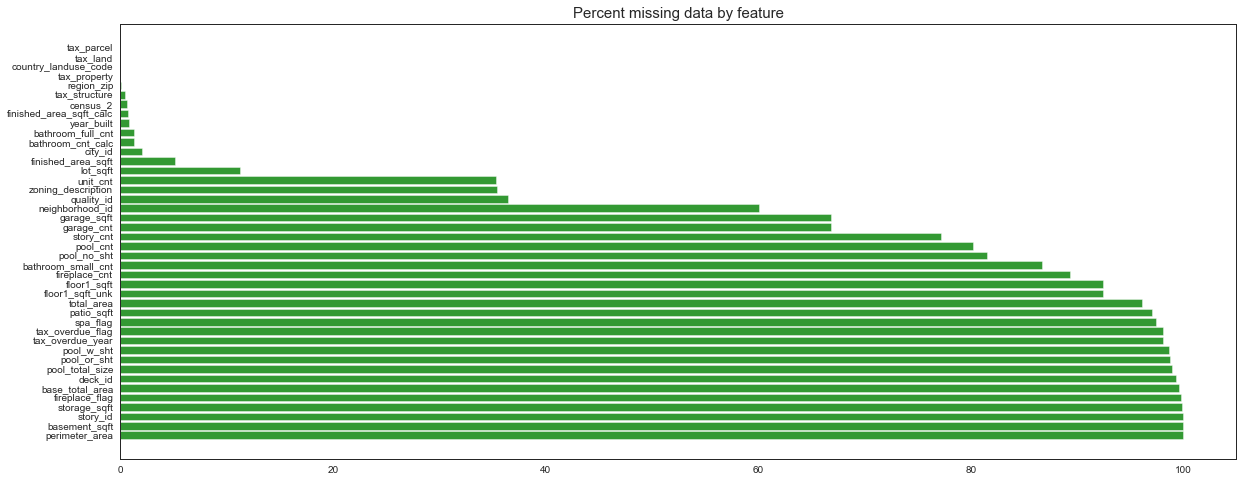

In [9]:
data_proc.missingData(train_2016)

## Distribution

count    90275.000000
mean         0.011457
std          0.161079
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: log_error, dtype: float64


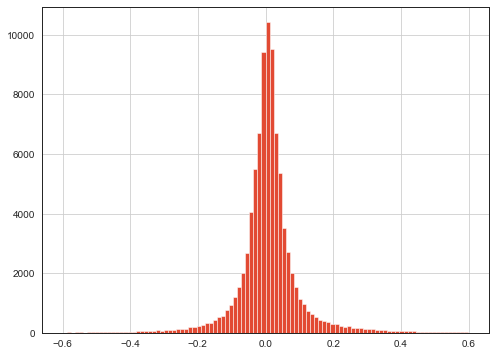

In [10]:
# Look at the distribution of the target variable (log-error)
print(train_2016['log_error'].describe())

# Meaning abs(Zestimate/Sale_price) > 4
train_2016.loc[abs(train_2016['log_error']) < 0.6, 'log_error'].hist(bins=100);

In [11]:
# Looks like there are some outliers in the training data (very large log-error, x10^4)
# abs(log-error) > 0.6 seems abnormal, should probably remove them from the training set
threshold = 0.6
print("{} training examples in total".format(len(train_2016)))
print("{} with abs(log_error) > {}".format((abs(train_2016['log_error']) > threshold).sum(), threshold))

train_2016 = train_2016[abs(train_2016.log_error) <= threshold]

90275 training examples in total
951 with abs(log_error) > 0.6


In [12]:
# Let's see if there are any feature value outliers -> looks like things are mostly fine, no need to process
prop.describe().loc[['min', 'max', 'mean']].T

,min,max,mean
parcel_id,1.071172e+07,1.696019e+08,1.332586e+07
basement_sqft,2.000000e+01,8.516000e+03,6.468833e+02
bathroom_cnt,0.000000e+00,2.000000e+01,2.209142e+00
bedroom_cnt,0.000000e+00,2.000000e+01,3.088949e+00
quality_id,1.000000e+00,1.200000e+01,5.784787e+00
bathroom_cnt_calc,1.000000e+00,2.000000e+01,2.299263e+00
deck_id,6.600000e+01,6.600000e+01,6.600000e+01
floor1_sqft,3.000000e+00,3.130300e+04,1.380630e+03
finished_area_sqft_calc,1.000000e+00,9.525760e+05,1.827163e+03
finished_area_sqft,1.000000e+00,2.903450e+05,1.760001e+03


## Analyze time dependency

In [13]:
datetime = pd.to_datetime(train_2016.transaction_date).dt
train_2016['month'] = datetime.month
train_2016['quarter'] = datetime.quarter

# Mode log_error month & quarter
print(train_2016.groupby('month')[['month', 'log_error']].median())
print("-"*25)
print(train_2016.groupby('quarter')[['quarter', 'log_error']].median())

       month  log_error
month                  
1          1     0.0090
2          2     0.0080
3          3     0.0010
4          4     0.0030
5          5     0.0030
6          6     0.0040
7          7     0.0050
8          8     0.0050
9          9     0.0100
10        10     0.0100
11        11     0.0119
12        12     0.0100
-------------------------
         quarter  log_error
quarter                    
1              1     0.0050
2              2     0.0030
3              3     0.0070
4              4     0.0109


## Map neighborhood-based aggregate features 

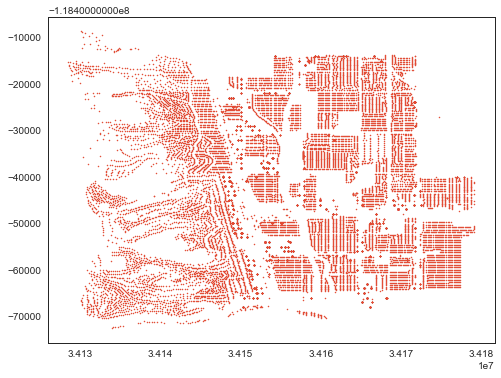

In [14]:
# Let's see how a 'neighborhood' is defined
# Maybe we can extract some neighborhood-based aggregate features
df = prop[prop.neighborhood_id == 27080]
plt.scatter(df.latitude, df.longitude, s=1);